<a href="https://colab.research.google.com/github/irishpaladin/CS490DB-Project/blob/master/CS490DB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
CS 490DB - Applications in Natural Sciences

Due: Thursday, December 5, 2019, at 11:59 pm

Instructor: Trevor Tomesh

By: Stephanie Irish Paladin

Student id - 200413341

Email: stephanieirishpaladin@gmail.com
```



#Project
In this project, my goal is to predict the price of the houses in King City, USA using the data I got from [Kaggle.com](https://kaggle.com)  


##Part A - Determining a proper model


Since I am dealing with mostly numerical data, I concluded that I would be using Regression analysis. As for what type of algorithm I will be using, I rely on the Scikit-learn algorithm cheat-sheet, and it gave me a result of Ridge Regression. The score I got in using the Ridge Regression is not as high as I thought it would be, so I tried to use different types of algorithm. I got a better score after using Linear Algorithm with Polynomial feature, and so I decided to use that model for this project.

**Polynomial Regression**

Polynomial Regression is a form of linear regression but with a curve. The value of the dependent variable y depends on a function with x raised to the nth power wherein 'n' is the degree of the polynomial and x is an independent variable.






To implement the algorithm, we need to import the following libraries from sklearn:
```
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
```
*Polynomialfeatures* is used in transforming the x values to accommodate the "polynomial feature" of the model.

*LinearRegression* library is used in creating the model, but instead of the original x values, we will be using the transformed x values.


##Part B - Apply the Algorithm




**Preparing Data**

In [1]:
# Importing necessary libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [0]:
#cd grive/My\ Drive/2Year1Term/CS490DB/CS490DB-Project/data

In [0]:
# Retrieving data
data = pd.read_csv("kc_house_data.csv")

In [7]:
data.shape

(21613, 21)

In [8]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Seeing the above information, few values needs to be manipulated.

1.   date as datatype datetime
2.   bathrooms from float to int
3.   floors from float to int



In [0]:
# Change datatypes
data['date'] = pd.to_datetime(data['date'])
data['bathrooms'] = data['bathrooms'].astype('int')
data['floors'] = data['floors'].astype('int')

In [10]:
# See if there's duplicate
data.id.duplicated

<bound method Series.duplicated of 0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: int64>

Since the column 'id' is unique, I will change the index of the Data Frame with the id.

In [0]:
# Set id as index
data.set_index(data.id, inplace=True)

The column date and yr_built column can be combined into a single column. I will name it as house_age

In [0]:
# Combine two column
data["house_age"] = data["date"].dt.year - data['yr_built']

The column yr_renovated will be changed to a boolean value to avoid extreme values in the data.

In [0]:
# Modify data
data['renovated'] = data['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

Luckily, I do not have any missing values in the dataset.

In [14]:
# Check for null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
house_age        0
renovated        0
dtype: int64

Since there are no missing values, and so I will start removing unneeded values.

In [15]:
# Removing data
data.drop('date', axis=1, inplace=True)
data.drop('yr_built', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('yr_renovated',axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0



**Creating Model**


In [0]:
# Import necessary library
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [0]:
# Preparing the data
y = data['price'].astype('int')
X = data.drop('price', axis = 1)


To test the accuracy of the model, I split the data into two parts:


1.   Train data: Data that will be used to fit to create the model.
2.   Test data: Data that will be used to test the data.



In [0]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Fit and transforms the data to a Polynomial Feature
X_train_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)

# Create model
model = LinearRegression().fit(X_train_,y_train)

# Predicting values using the test data
X_test_= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
pred = model.predict(X_test_)
pred

array([ 492626.29763794,  761132.21964264, 1272513.18667984, ...,
        344111.99469757,  807933.45336151,  475926.00987244])

##Part C - Visualize and Explain Your Model





I used seaborn to plot the relationship between the predicted and actual data. The diagonal line in the middle is the line of best fit. The nearer the plot is in the line, the more accurate the predicted data is.



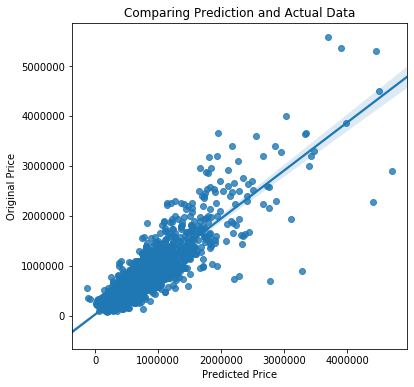

In [20]:
  # Plots the model and the original data

plt.figure(figsize= (6, 6))
plt.title('Comparing Prediction and Actual Data')

sns.regplot(pred, y_test)
plt.xlabel("Predicted Price")

plt.ylabel("Original Price")
plt.show()

In [0]:
# Get the values needed to plot the data
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]
b3 = model.coef_[2]

In [22]:
print('intercept: ',b0)
print('coef_0: ', b1)
print('coef_1: ',b2)
print('coef_2: ',b3)

intercept:  23067369199.749798
coef_0:  9708610.618472654
coef_1:  -11902570.169599747
coef_2:  12668.480646048221


**Providing statistical information that supports the model.**




In [23]:
print("Mean absolute error:", mean_absolute_error(y_test, pred))
rmse = np.sqrt(mean_squared_error(y_test,pred))
print('Mean squared error: ',rmse)
r2 = r2_score(y_test,pred)
print("Coeffients: ", model.coef_)
print("Intercepts:" ,model.intercept_)
print('r2_score: ',r2_score(y_test,pred)*100)

Mean absolute error: 103849.90911144066
Mean squared error:  169898.9684452539
Coeffients:  [ 9.70861062e+06 -1.19025702e+07  1.26684806e+04 -1.67732523e+02
 -3.49286299e+07  7.67436941e+07 -4.21316262e+05  2.98104713e+06
 -1.41864311e+07  2.58445133e+04 -3.62192546e+04 -4.69774619e+05
  1.02712966e+08  3.95418158e+07 -1.65834986e+04  8.65412262e+02
  1.88817529e+04  3.47129767e+07  7.56025398e+02 -7.24558193e+03
  2.68739507e+02  1.02165594e-01  2.74294986e+04 -5.62112388e+04
  2.05970101e+03 -1.00412427e+03  4.55176648e+03 -2.94051122e+02
 -2.80463130e+02  1.02359093e+01 -3.59286928e+04  7.40378158e+04
  6.78301611e+00  5.51175177e-02  2.69436016e+02 -2.92410916e+04
 -3.72522794e+03  3.29780184e+01 -3.78420031e-01 -3.84232338e+04
  1.43765898e+04  9.40565707e+03 -1.02912250e+04  1.75274150e+03
  3.00864912e+01  1.84074995e+00 -1.02062410e+02  6.81461591e+04
 -1.53194082e+05 -1.64529970e+01  2.61422055e-01 -2.33159683e+02
 -1.84509900e+04  2.21517871e+02 -5.83089667e+02 -2.09360295e+0

**Relationship of data**

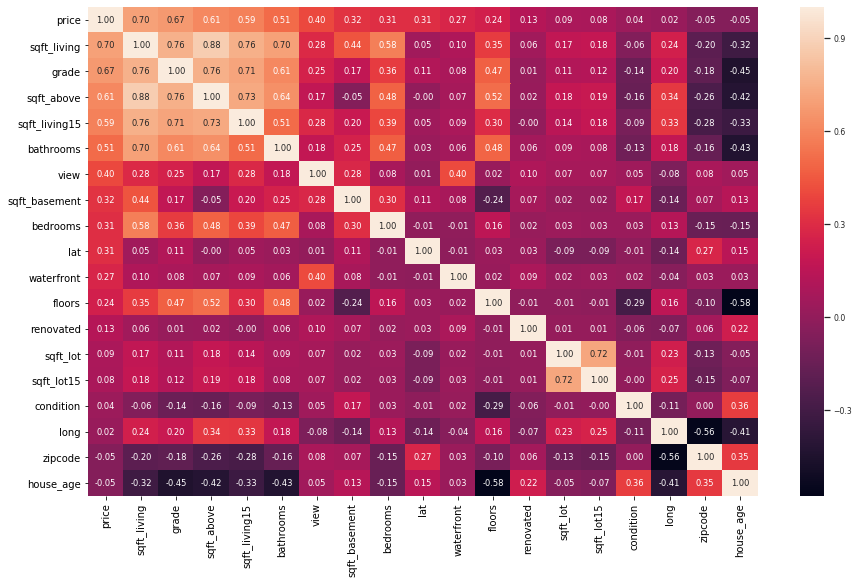

In [24]:
# Plotting heatmap
fig, ax = plt.subplots(figsize=(15,9))   
correlation = data.corr(method='pearson')
columns = correlation.nlargest(19, 'price').index
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=0.7)
heatmap = sns.heatmap(correlation_map, annot=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values, ax=ax)

plt.show()

In [25]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


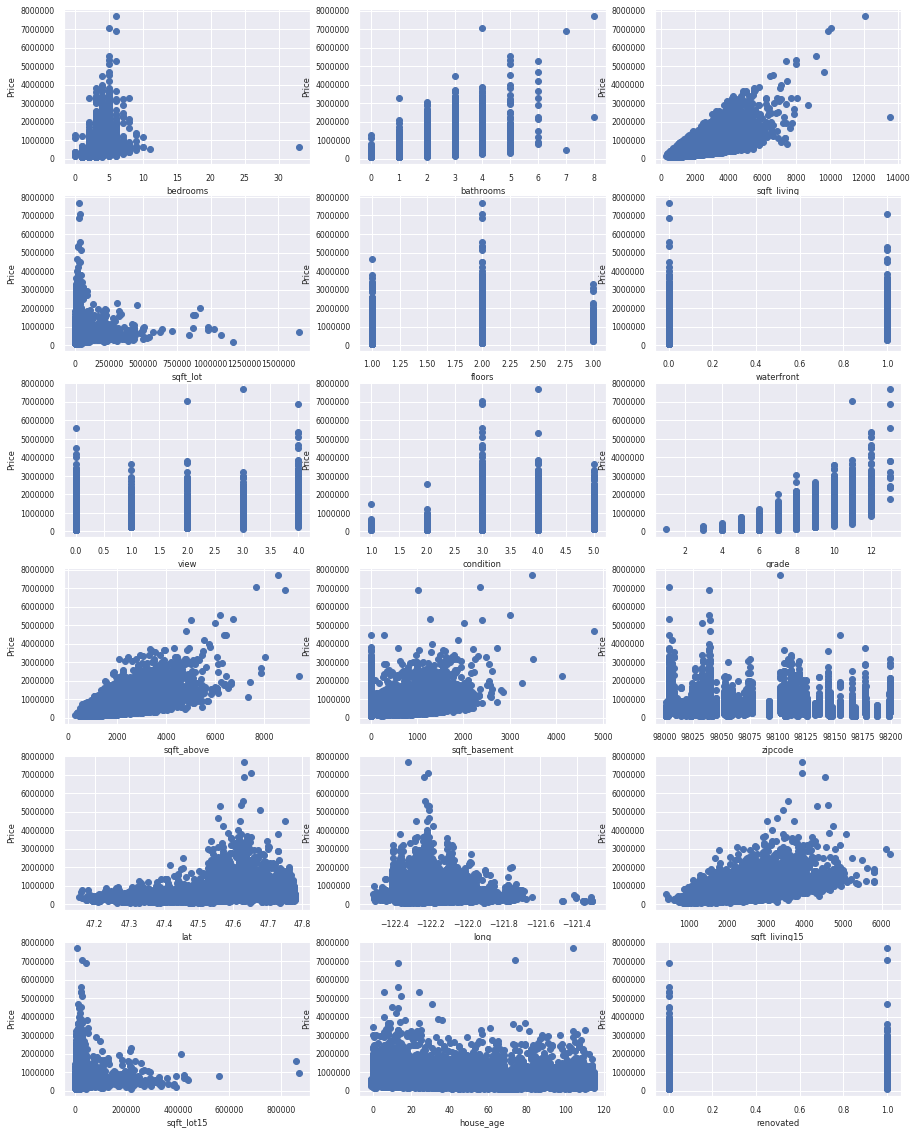

In [26]:
header = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
        'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
        'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
        'sqft_lot15', 'house_age', 'renovated'  ]

i = 1
fig, ax = plt.subplots(figsize=(15,20)) 
for feature in header:
  plt.subplot(6, 3, i)
  x = data[feature]
  plt.scatter(x, data.price)
  plt.ylabel('Price')
  plt.xlabel(feature)
  i += 1

plt.show()




The model produced a negative and positive coefficients. Looking at the relationship between the data, the price of the house is directly proportional to the sqrft_living and grade of the house. There is a big possibility that the positive coefficient has a relationship with either of the two columns.

Meanwhile, house_age had an indirect relationship with the price. Price lowers whenever the age of the house increases. In reality, this, of course, is true, especially for the houses that have not been renovated for a long time. I could infer that this is the value that has the most impact on the negative coefficient.

##Part D - Discussion




**Implication of the model and does it have the power to predict the outcome of  future instances?**

The score was not high as I thought it would be, but considering the number of data, I believe that having an 80% score is good. It does predict the price of a house accurately if I used a part of the original data as a tester. However, I also tried to come up with reasonable values to be fed in the model (test data below this section), and the result was not satisfying. I lose confidence about whether the model can predict "exact" or near-exact outcome of future instances.

 **Create a fictional instance to analyze. How well does the model describe the outcome?**

I created a fictional instance that is to be fitted on the model. At first, I thought I did a well-made model because it has a high score, but later on, I realized that the predicted values its giving is not the price I expected it to have considering the data I have given. 

I fed it a three values: the first is a random data I came up with, the second one has the same values as the first, but with difference of 100  in sqft_basement, and the last is a data taken into the original data that has far more better feature than the first two and has highest sqft_basement of the three.

 The predicted data was not what I expect it to be. After comparing the predicted data of the first and second, the price took a huge leap, from 6.7+04 to 6.6e+10, but then the only difference was a 100 in sqft_basement. Then, the 3rd value, which should be the most expensive, considering its given features, was only 2nd to the highest, and its price is far from the fictional house I came up with.

The result was confusing but even so it gives a high score. I might have some misunderstanding regarding the machine learning in general, or it might have somwthing to do with the data.

In [0]:
fictional_data = pd.read_csv("fictional_data.csv")

In [28]:
fictional_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,2,1,1600,6070,1,0,0,3,6,1600,0,98125,47.3412,-122.234,1134,1347,78,0
1,2,1,1600,6070,1,0,0,3,6,1600,100,98125,47.3412,-122.234,1134,1347,78,0
2,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1


In [29]:
fictional_data_= PolynomialFeatures(degree=2, include_bias=False).fit_transform(fictional_data)
pred = model.predict(fictional_data_)

print("Predicted Price: ", pred)

Predicted Price:  [6.70412793e+04 6.16681845e+10 6.27202307e+05]


In [30]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,
7129300520,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


**Limitation of the Model**

The model has done well with the data it has been given but the end result was not how I expected to be. The limitation of the model lies in the fact that it is an algorithm. It highly depends on the data that was given to it. A good model has to be accurate. To be accurate, it has to be fed with numerous and reliable data.


##Part E - Summary


**1. Summarize what you have done in your notebook. What was the goal and what were your results?**

The goal of this project is to predict the price of the house based on the features of that house. I have a dataset that contains data on the houses and their prices. I cleaned the data by modifying some of the values' data type as well as (combining two columns to one). Using the cleaned data, I created a Polynomial regression model, which resulted in an 80% score, which reasonably high considering the number of data it has. The end result was not how I expected it to be. In the end, I got a confusing result once I fed the model random but reasonable values. I expect it to give a low price, but it unexpectedly gave a price that is higher than a house with features that is better than it.

**2. Reflect on whether some other analysis would have been better for this data.**

The result was not satisfying. There might be a better approach to go about this model. As I have limited knowledge in Machine Learning, unfortunately, I was not able to maximize the use of the data.

**3. Finally, what sort of new knowledge were you able to create from your analysis?**

I have learned a lot about cleaning the data. Cleaning data is not as easy as I imagine it to be. I have to consider many things before removing or modifying the data. I learned that even just one small change in the data gives a significant change in the model. This might also be one of the reasons for the confusing result in the end.





##References

[1] Choosing the right estimator — scikit-learn 0.21.3 documentation. Scikit-learn.org. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. Published 2019. [Accessed November 30, 2019].

[2] House Sales in King County, USA. Kaggle.com. https://www.kaggle.com/harlfoxem/housesalesprediction. Published 2019. [Accessed November 30, 2019].